In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 13.5

# Crypten

In [2]:
crypten_data = pd.read_csv('../chz-sok-nn-experiments/crypten_experiments/multiparty_nn.csv',
                        #    skiprows=(lambda x: (x % 2 != 0)),
                           header=None,
                           )
# epoch_duration, epoch, batch_size, data_size, accuracy, test_duration
crypten_data.columns = ['epoch_duration', 'epoch', 'batch_size', 'data_size', 'accuracy', 'test_duration','num_agents']

# crypten_data = crypten_data.drop(index=range(14))
# crypten_data = crypten_data[crypten_data['epoch'] == 2]

print(crypten_data)

mean_crypten = crypten_data.groupby(['num_agents','epoch'])['epoch_duration'].median()
print(mean_crypten)
mean_crypten = mean_crypten.groupby('num_agents').sum()
print(mean_crypten)

# stdev_crypten = crypten_data.groupby('data_size')['epoch_duration'].std()
# print(stdev_crypten)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration  \
0      2541.939284      0          64      60000    0.3170     116.811908   
1      2541.955054      0          64      60000    0.3170     116.812123   
2      2540.002576      1          64      60000    0.5765     117.073965   
3      2540.002631      1          64      60000    0.5765     117.073949   
4      2581.387477      2          64      60000    0.6167     118.547780   
5      2581.387158      2          64      60000    0.6167     118.548136   
6      4490.672649      0          64      60000    0.3110     195.134824   
7      4490.674194      0          64      60000    0.3110     195.134881   
8      4490.691380      0          64      60000    0.3110     195.135432   
9      4388.518347      1          64      60000    0.5773     194.050429   
10     4388.518370      1          64      60000    0.5773     194.050480   
11     4388.518487      1          64      60000    0.5773     194.050351   

# Plaintext Torch

In [3]:
torch_data = pd.read_csv('../chz-sok-nn-experiments/torch_experiments/mnist/mnist_total_time.csv',
                         header=None,
                         )
torch_data.columns = ['total_duration', 'data_size']

torch_data = torch_data[torch_data['data_size'] == 60000]

# print(torch_data)

torch_medians = [torch_data['total_duration'].median()] * 3
print(torch_medians)
torch_stdev = [torch_data['total_duration'].std()] * 3
print(torch_stdev)

[11.345573307015002, 11.345573307015002, 11.345573307015002]
[0.045928917801767326, 0.045928917801767326, 0.045928917801767326]


# NVFlare

In [4]:
nvflare_medians = []
nvflare_stdevs = []
for datasize in [60000, 'mp-3-60000', 'mp-4-60000']:
    nvflare_data = pd.read_csv(f'../chz-sok-nvflare-experiments/fl-nn/experiments/mnist/{datasize}/total_time.csv',
                header=None,
                )
    # total_duration, run_id, timestamp
    nvflare_data.columns = ['total_duration', 'run_id', 'timestamp']
    nvflare_medians.append(nvflare_data['total_duration'].median())
    nvflare_stdevs.append(nvflare_data['total_duration'].std())
print(nvflare_medians)
print(nvflare_stdevs)

[43.956458, 43.912614000000005, 46.119011]
[0.28762160001194825, 0.29505075794756497, 1.2192081159697055]


# Data Station

In [5]:
ds_data = pd.read_csv('../datastation-escrow/examples/training_scenario/mnist/mnist_total_time.csv',
                        header=None,
                        )
# total_duration, data_size
ds_data.columns = ['total_duration', 'data_size']

ds_data = ds_data[ds_data['data_size'] == 60000]

ds_median = ds_data['total_duration'].median()
ds_stdev = ds_data['total_duration'].std()

ds_medians = [ds_median]
ds_stdevs = [ds_stdev]


for party in [3,4]:
    ds_data = pd.read_csv(f'../datastation-escrow/examples/training_scenario/mnist_mp/mnist_total_time-mp-{party}.csv', header=None)
    ds_data.columns = ['total_duration', 'data_size']
    
    ds_data.drop(index=0, inplace=True)

    ds_median = ds_data['total_duration'].median()
    ds_stdev = ds_data['total_duration'].std()
    ds_medians.append(ds_median)
    ds_stdevs.append(ds_stdev)

print(ds_medians)
print(ds_stdevs)

[15.664348165038971, 15.847320273984224, 15.831072064582258]
[0.1551052660061423, 0.1970693082942464, 0.19153693908048808]


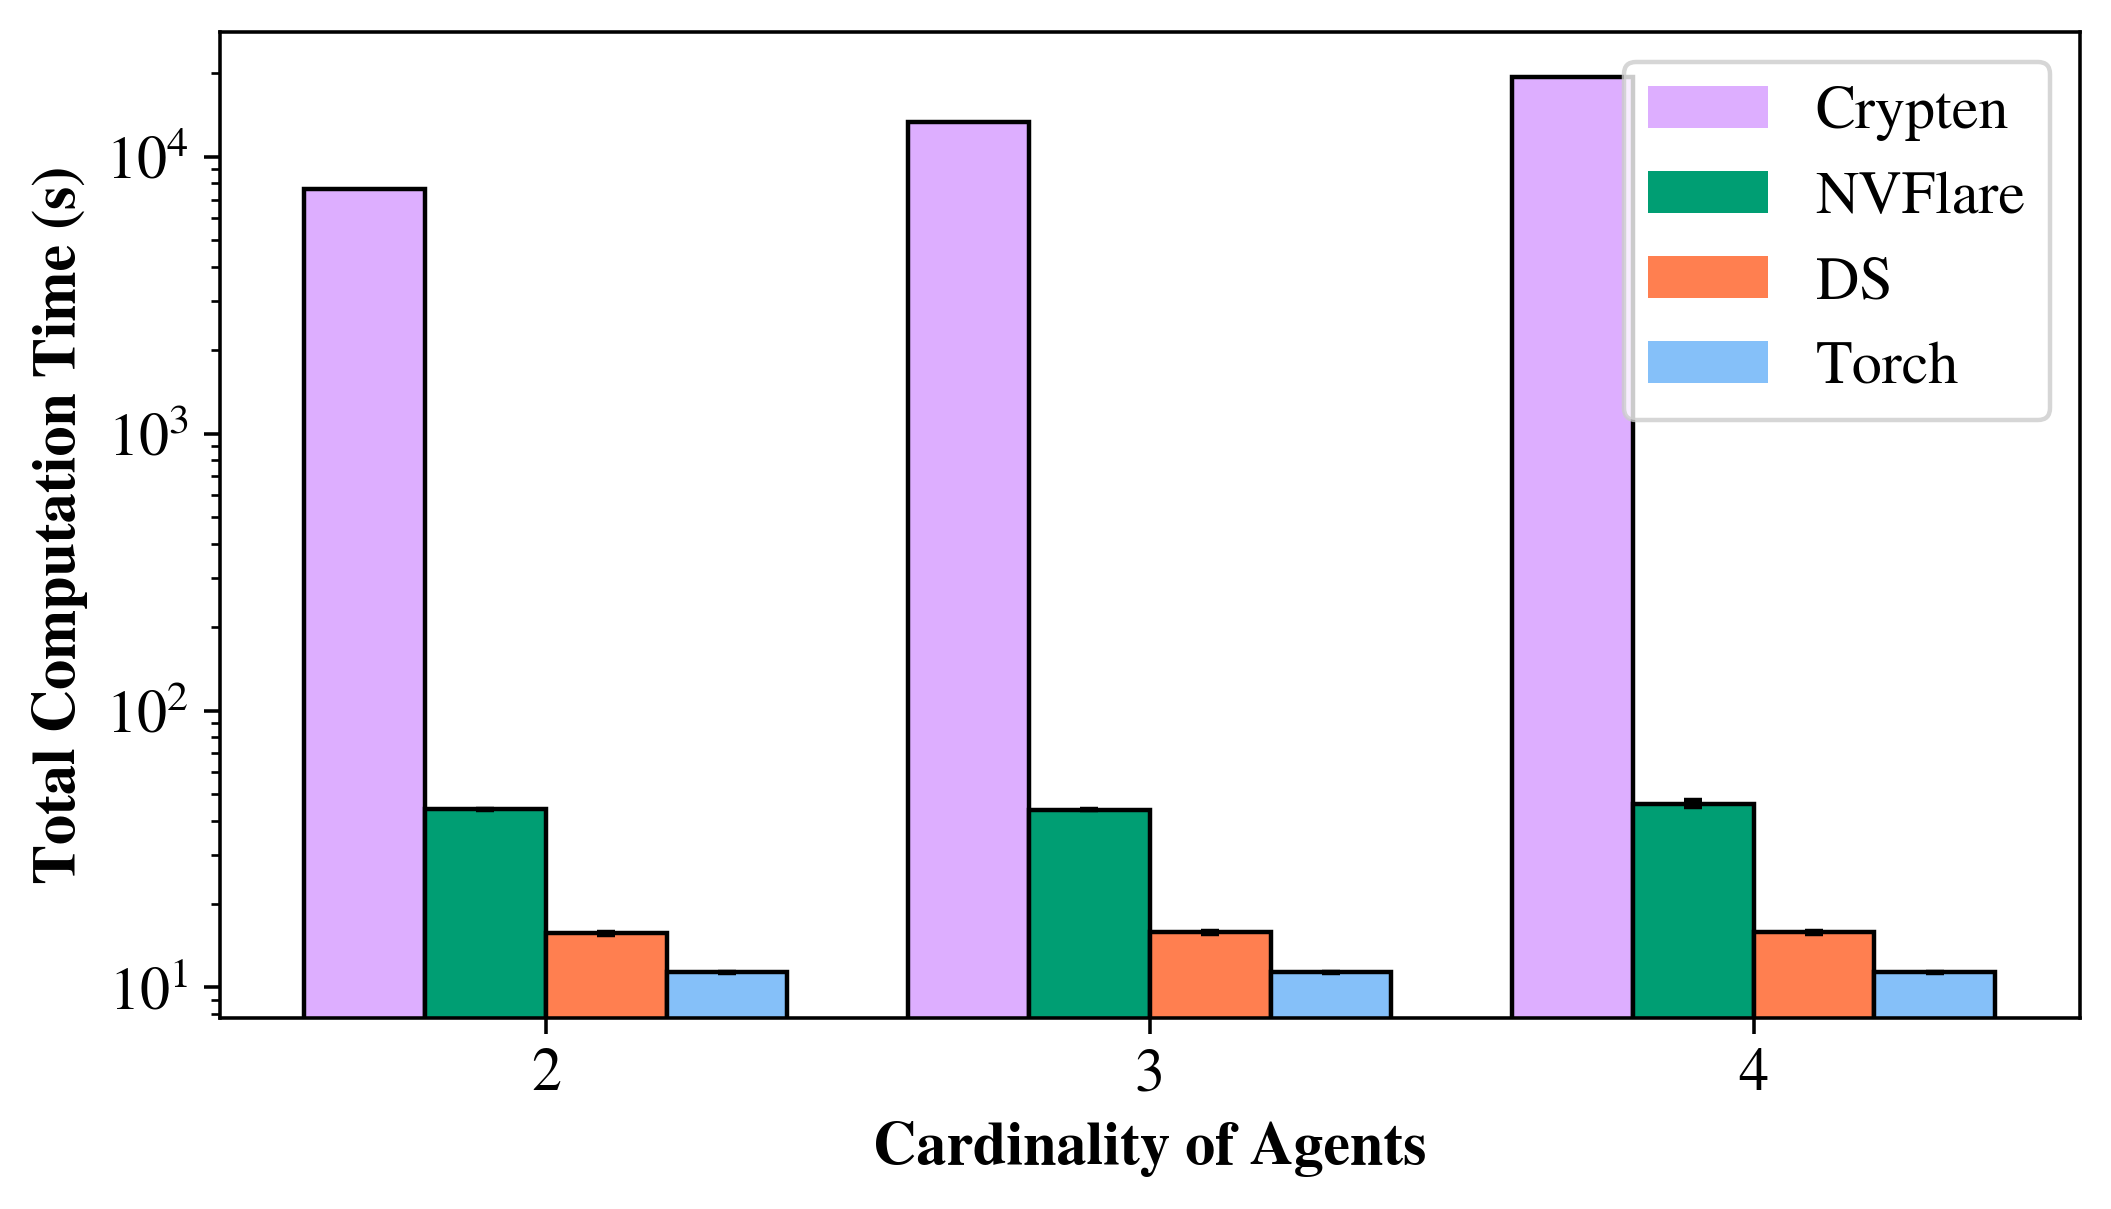

In [6]:
X_axis = np.arange(3)+1
width = 0.2

plt.figure(figsize=(7.5, 4), dpi=320)

# Crypten
plt.bar(x=X_axis-1.5*width, width=width, height = mean_crypten, label = "Crypten", color='#ddaeff')
plt.bar(x=X_axis-1.5*width,width=width,height=mean_crypten,
        # yerr=conclave_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

# NVFlare
plt.bar(x=X_axis-0.5*width, width=width, height = nvflare_medians, label = "NVFlare", color='#009E73')
plt.bar(x=X_axis-0.5*width,width=width,height=nvflare_medians,yerr=nvflare_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

# Data Station
plt.bar(x=X_axis+0.5*width, width=width, height = ds_medians, label = "DS", color='coral')
plt.bar(x=X_axis+0.5*width,width=width,height=ds_medians,yerr=ds_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

# Torch
plt.bar(x=X_axis+1.5*width, width=width, height = torch_medians, label = "Torch", color='#85C0F9')
plt.bar(x=X_axis+1.5*width,width=width,height=torch_medians,
        yerr=torch_stdev,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.yscale('log')

plt.xlabel("Cardinality of Agents", fontweight="bold")
plt.ylabel("Total Computation Time (s)", fontweight="bold")
# plt.title("Basic NN Training Time on FashionMNIST")
plt.legend()

plt.xticks(X_axis, ["2", "3", "4"])

plt.savefig("multiparty_mnist_nn.pdf", bbox_inches='tight')

plt.show()

# Accuracy

## Data Station

In [7]:
ds_acc = pd.read_csv('../datastation-escrow/examples/training_scenario/mnist/mnist.csv',
                        # header=None,
                        )
ds_acc = ds_acc[ds_acc['epoch'] == '2']
ds_acc = ds_acc[ds_acc['data_size'] == '60000']
ds_acc = pd.to_numeric(ds_acc['accuracy'])

ds_acc_medians = [ds_acc.median()]
ds_acc_stdevs = [ds_acc.std()]

for party in [3,4]:
    ds_acc = pd.read_csv(f'../datastation-escrow/examples/training_scenario/mnist_mp/mnist-mp-{party}.csv',
                        #   header=None
                          )
    # ds_data.columns = ['total_duration', 'data_size']
    
    # ds_acc.drop(index=0, inplace=True)
    ds_acc = ds_acc[ds_acc['epoch'] == '2']

    ds_acc_median = pd.to_numeric(ds_acc['accuracy']).median()
    ds_acc_stdev = pd.to_numeric(ds_acc['accuracy']).std()
    # ds_stdev = ds_data['total_duration'].std()
    ds_acc_medians.append(ds_acc_median)
    ds_acc_stdevs.append(ds_acc_stdev)

print(ds_acc_medians)
print(ds_acc_stdevs)

[0.6117, 0.6217, 0.6175]
[0.015116444988518591, 0.015084633963679117, 0.01684470782822254]


## Plaintext

In [8]:
torch_acc = pd.read_csv('../chz-sok-nn-experiments/torch_experiments/mnist/mnist.csv',)

# epoch_duration, epoch, batch_size, data_size, accuracy, test_duration
torch_acc.columns = ['epoch_duration', 'epoch', 'batch_size', 'data_size', 'accuracy', 'test_duration']
torch_acc = torch_acc[torch_acc['epoch'] == 2]

torch_acc_medians = torch_acc.groupby('data_size')['accuracy'].median()
print(torch_acc_medians)

torch_acc_stdevs = torch_acc.groupby('data_size')['accuracy'].std()
print(torch_acc_stdevs)

data_size
7500     0.2617
15000    0.3677
30000    0.5152
60000    0.6167
Name: accuracy, dtype: float64
data_size
7500     0.051987
15000    0.064702
30000    0.035256
60000    0.018779
Name: accuracy, dtype: float64


## NVFlare

In [9]:
nvflare_acc_medians = []
nvflare_acc_stdevs = []
for idx, datasize in enumerate([60000, 'mp-3-60000', 'mp-4-60000']):
    nvflare_acc = pd.read_csv(f'../chz-sok-nvflare-experiments/fl-nn/experiments/mnist/{datasize}/datasize_mnist_nn.csv',)
    nvflare_acc.columns = ['accuracy', 'epoch', 'batch_size', 'data_size', 'site']

    nvflare_acc = nvflare_acc[nvflare_acc['batch_size'] != 64.0]
    nvflare_acc = nvflare_acc[nvflare_acc['site'] == 'site-1']
    # print(nvflare_acc)
    
    # get every n+1 element
    nvflare_acc = nvflare_acc.iloc[::(idx+3), :]
    # print(nvflare_acc)

    nvflare_acc_median = nvflare_acc['accuracy'].median()
    nvflare_acc_stdev = nvflare_acc['accuracy'].std()
    nvflare_acc_medians.append(nvflare_acc_median)
    nvflare_acc_stdevs.append(nvflare_acc_stdev)
print(nvflare_acc_medians)
print(nvflare_acc_stdevs)

[0.5260499999999999, 0.45715, 0.3415]
[0.03017825560086452, 0.023124647745064866, 0.05972631655216056]


## Crypten

In [10]:
crypten_acc = pd.read_csv('../chz-sok-nn-experiments/crypten_experiments/multiparty_nn.csv',
                        #    skiprows=(lambda x: (x % 2 != 0)),
                           header=None,
                           )
# epoch_duration, epoch, batch_size, data_size, accuracy, test_duration
crypten_acc.columns = ['epoch_duration', 'epoch', 'batch_size', 'data_size', 'accuracy', 'test_duration','num_agents']

# crypten_data = crypten_data.drop(index=range(14))
crypten_acc = crypten_acc[crypten_acc['epoch'] == 2]


crypten_acc = crypten_acc.groupby(['num_agents','epoch'])['accuracy'].median()
crypten_acc_medians = crypten_acc.groupby('num_agents').sum()
print(crypten_acc_medians)

# only one crypten trial. no stdev
# crypten_acc_stdevs = crypten_acc.groupby('num_agents').std()
# print(crypten_acc_stdevs)

num_agents
2    0.6167
3    0.6222
4    0.6258
Name: accuracy, dtype: float64


In [ ]:
# Data Parsing for output
for idx, a in enumerate([2,3,4]):
    crypten_acc_median = crypten_acc_medians[a]
    nvflare_acc_median = nvflare_acc_medians[idx]
    ds_acc_median = ds_acc_medians[idx]
    torch_acc_median = torch_acc_medians[60000]
    out = f"MNIST {a}-Agent 60000 & {crypten_acc_median:.4f} & {nvflare_acc_median:.4f} & {ds_acc_median:.4f} & {torch_acc_median:.4f} \\\\"
    print(out)
    print("\hline")

MNIST 2 Agent 60000 & 0.6167 & 0.5260 & 0.6117 & 0.6167 \\
\hline
MNIST 3 Agent 60000 & 0.6222 & 0.4572 & 0.6217 & 0.6167 \\
\hline
MNIST 4 Agent 60000 & 0.6258 & 0.3415 & 0.6175 & 0.6167 \\
\hline
